# 1. 통계 문제 

### 문제 1)

- 빵집에서는 매일 아침에 구워지는 식빵 한 개의 평균 무게가 500g이 되도록 맞추고자 합니다. 빵집 주인은 오늘 아침에 구운 식빵 중에서 랜덤하게 25개의 식빵을 샘플링하여 무게를 측정했습니다. 그 결과, 표본 평균은 495g, 표준편차는 10g으로 나왔습니다. 빵집 주인이 목표한 500g의 무게를 충족하고 있는지(다시말해 목표 무게를 넘는지 안 넘는지)  5% 유의수준에서 검정해보세요

In [1]:
import numpy as np
from scipy.stats import t 

sample_mean = 495 
sample_std  = 10.0 # 연속적인 값이니 실수형으로 선언
n           = 25   # 표본크기
mu0         = 500.0# 귀무가설의 평균값
alpha       = 0.05 # 유의수준

# t-통계량 계산
t_statistic = (sample_mean - mu0) / (sample_std / np.sqrt(n))
df          = n - 1 # 자유도 계산

# p-value 계산 
p_value = 2 * t.cdf(-abs(t_statistic), df)

# 결과 출력
if p_value < alpha:
    print(f"t-값: {t_statistic:.4f}, p_value: {p_value:.4f}. "
          f"유의수준 {alpha:.2f}에서 귀무가설을 기각합니다. "
          "빵의 평균 무게는 목표와 다릅니다.")
else:
    print(f"t-값: {t_statistic:.4f}, p_value: {p_value:.4f}. "
      f"유의수준 {alpha:.2f}에서 귀무가설을 채택합니다. "
      "빵의 평균 무게는 목표와 통계적으로 차이가 없습니다.")

t-값: -2.5000, p_value: 0.0197. 유의수준 0.05에서 귀무가설을 기각합니다. 빵의 평균 무게는 목표와 다릅니다.


### 문제2) 분포 시각화

문제 1번을 바탕으로 분포를 그리고 t통계량을 빨간색 점선으로, 초록색 점선으로 임계값을 기각역을 초록색으로 칠해보세요.

***기각역**:  통계량이 들어왔을 경우 귀무가설을 기각할 수 있는 영역을 말합니다.

 Hint)

- `plt.axvline` : y축 평행선 그리기
- `plt.fill_between` : 그래프 면적 색칠하기

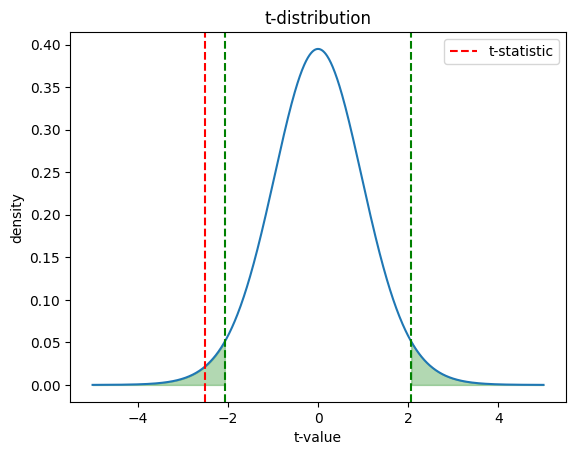

In [2]:
import matplotlib.pyplot as plt

# 파라미터 설정
df = 24
alpha = 0.05
t_statistic = -2.5
critical = t.ppf(1 - alpha/2, df)

# 확률밀도
x = np.linspace(-5, 5, 1000)
y = t.pdf(x, df)

plt.plot(x, y)

# 수직선
plt.axvline(t_statistic, linestyle='--', color='red', label='t-statistic')
plt.axvline(critical, linestyle='--', color='green')
plt.axvline(-critical, linestyle='--', color='green')

# 기각역 색칠
plt.fill_between(x, y, where=(x <= -critical), color='green', alpha=0.3)
plt.fill_between(x, y, where=(x >= critical), color='green', alpha=0.3)

# 레이블
plt.xlabel('t-value')
plt.ylabel('density')
plt.title('t-distribution')
plt.legend()


### 문제 3) 단일 t 표본 검정

- 어느 학교에서 새로운 교육 프로그램을 도입한 후 학생들의 수학 성적이 향상되었는지 확인하려고 합니다. 프로그램 도입 후 무작위로 선택한 16명의 학생들의 수학 성적 평균은 78점이고, 모집단의 평균은 75점입니다. 모집단의 표준편차는 알 수 없다고 합니다.
- 유의수준 0.05에서 이 교육 프로그램이 성적 향상에 효과가 있는지 단일 표본 t-검정을 실시하세요.

<aside>
💡

수업시간에 양측검정을 기준으로 배웠습니다. 다시말하면 데이터의 평균이 특정 값과 같은지 아닌지(방향은 관심없음)입니다. 문제는 **향상에 효과가 있는지** 에 대한 물음입니다. 함수를 무엇을 어떻게 넣어야할지 고민해보세요!(힌트 scipy docs 참고)

</aside>

In [3]:
from scipy.stats import ttest_1samp

# 예시 데이터
sample_scores = np.array([79, 77, 80, 76, 78, 81, 75, 79,
                         77, 80, 78, 76, 82, 77, 79, 78])

alpha = 0.05
popmean = 75.0

# 단측 검정
t_stat, p_value = ttest_1samp(
    sample_scores,
    popmean=popmean,
    alternative='greater'
)

print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}")
if p_value < alpha:
    print("유의수준 0.05에서 귀무가설을 기각합니다. 교육프로그램은 효과가 있습니다.")
else:
    print("유의수준 0.05에서 귀무가설을 채택합니다. 교육프로그램은 효과가 없습니다.")



t-값: 6.7890, p-value: 0.0000
유의수준 0.05에서 귀무가설을 기각합니다. 교육프로그램은 효과가 있습니다.


### 문제 4) 독립 표본 t 검정

- 한 연구소에서 두 가지 새로운 다이어트 프로그램의 효과를 비교하려고 합니다. 연구소는 두 그룹의 참가자들을 대상으로 12주간 다이어트 프로그램을 진행한 후 체중 감소량을 측정했습니다.
- 유의수준 5% 에서 두 그룹 간 평균 체중 감소량에 유의미한 차이가 있는지 독립 표본 t-검정을 실시하세요.

<aside>
💡

관찰연구에서는  두개의 그룹을 t검정을 할때 등분산성을 검정하게 됩니다.  `scipy.stats.levene` 문서를 읽고 등분산 검정 후 적절한 검정방법을 적용해보세요. 등분산 검정에도 역시 귀무가설과 대립가설이 존재합니다.

</aside>

In [4]:
from scipy.stats import levene, ttest_ind

# 데이터
group_A = np.array([5.1, 4.7, 6.2, 4.9, 5.3, 6.1, 5.0, 5.8, 4.8, 5.2])
group_B = np.array([4.3, 4.1, 3.8, 4.6, 4.0, 4.5, 3.7, 4.2, 3.9, 4.4, 3.5, 4.3])
alpha   = 0.05

# 등분산 검정
stat_levene, p_levene = levene(group_A, group_B)
print(f"Levene 검정: stat={stat_levene:.4f}, p-value={p_levene:.4f}")

equal_var = p_levene >= alpha
print("등분산 가정" + ("유효" if equal_var else "기각"))

# 독립 표본 t-검정
t_stat, p_value = ttest_ind(group_A, group_B, equal_var=equal_var)

# 결과 출력
if p_value < alpha:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. "
    f"유의수준 {alpha:.2f}에서 귀무가설을 기각합니다. "
    "다이어트 프로그램은 효과가 있습니다.")
else:
    print(f"t-값: {f_stat:.4f}, p-value: {p_value:.4f}. "
          f"유의수준 {alpha:.2f}에서 귀무가설을 채택합니다. "
          "다이어트 프로그램은 효과가 없습니다.")

Levene 검정: stat=1.2856, p-value=0.2703
등분산 가정유효
t-값: 6.3898, p-value: 0.0000. 유의수준 0.05에서 귀무가설을 기각합니다. 다이어트 프로그램은 효과가 있습니다.


### 문제 5) 대응표본 t검정

<aside>
💡

대응표본 t-검정은 두 집단간 평균 차이를 비교할 때 사용되는 점은 독립 t검정 동일하나, 같은 집단에서 두 번 수집할 때 사용되는 검정입니다.( ex 고혈압 투여 전후 환자 단일 그룹의 혈압의 차) `scipy.stats` docs에서 적절한 함수를 찾아보고 적용해보세요. 

</aside>

- 운동 프로그램 전후의 체중 변화를 분석하기 위해 10명의 참가자의 체중을 측정했습니다. 유의수준 5%에서 운동 프로그램이 체중 감소에 효과가 있는지 **대응 표본 t-검정**을 실시하세요.
- 또한, 대응표본t검정에서 등분산 검정이 필요한지 고민해봅시다.

In [5]:
from scipy.stats import ttest_rel

alpha = 0.05

# 운동 프로그램 전후 체중 데이터
before = np.array([70, 80, 65, 90, 75, 85, 78, 82, 68, 73])
after  = np.array([68, 78, 64, 88, 74, 83, 77, 80, 67, 72])

# 대응표본 t-검정
t_stat, p_value = ttest_rel(before, after)

print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}")
if p_value < alpha:
    print(f"유의수준 {alpha:.2f}에서 귀무가설을 기각합니다. 운동 프로그램은 효과가 있습니다.")
else:
    print(f"유의수준 {alpha:.2f}에서 귀무가설을 채택합니다. 운동 프로그램은 효과가 없습니다.")

t-값: 9.0000, p-value: 0.0000
유의수준 0.05에서 귀무가설을 기각합니다. 운동 프로그램은 효과가 있습니다.


### 문제 6) 표본 추출

- Quest 05-01의  Online Retail II 데이터에서 표본을 추출하여 모집단의 평균을 추정해보세요.
- 영국(United Kingdom)에서 주문된 데이터 에서 30개, 100개, 300개의 샘플을 무작위 추출하여 평균 구매 금액(Total Price)를 계산해보세요. 표본의 크기가 커질 수록 모집단의 평균과 가까워지는지 확인해보세요.

In [6]:
pip install kaggle

Note: you may need to restart the kernel to use updated packages.


In [20]:
import pandas as pd

# 1) 엑셀 파일 경로 
file_path = '../Quest 03/online_retail_II.xlsx'

# 2) 데이터 로드 
retail = pd.read_excel(file_path, sheet_name='Year 2010-2011')
retail.columns = retail.columns.str.strip()

# 3) UK 주문만 필터링 및 TotalPrice 계산
uk = retail[retail['Country'] == 'United Kingdom'].copy()
# 컬럼명이 'Price'인 경우
uk['TotalPrice'] = uk['Quantity'] * uk['Price']

# 4) 모집단 평균 (참고용)
pop_mean = uk['TotalPrice'].mean()
print(f"Population mean TotalPrice: {pop_mean:.2f}")

# 5) 표본 크기별 무작위 추출 및 평균 계산
for n in [30, 100, 3000]:
    # random_state를 지정하면 시드 고정, 생략하면 매번 다른 샘플
    sample_mean = uk['TotalPrice'].sample(n, random_state=42).mean()
    print(f"Sample size: {n}, Mean TotalPrice: {sample_mean:.2f}")



Population mean TotalPrice: 16.53
Sample size: 30, Mean TotalPrice: 40.85
Sample size: 100, Mean TotalPrice: 21.91
Sample size: 3000, Mean TotalPrice: 16.77


### 문제 7) 신뢰구간

- 영국 데이터에서 TotalPrice를 사용하여 95% 신뢰 구간을 계산하세요. 또한 표본의 크기가 30,100, 300으로 변하면서 신뢰구간이 변하는 형태를 확인해 보세요.
- Hint) `stats` 모듈에서 신뢰구간을 바로 구하는 함수를 확인해보세요

In [22]:
import pandas as pd
import scipy.stats as stats

# 1) 엑셀 파일 경로 
file_path = '../Quest 03/online_retail_II.xlsx'

# 2) 데이터 로드 
retail = pd.read_excel(file_path, sheet_name='Year 2010-2011')
retail.columns = retail.columns.str.strip()

# 3) UK 주문만 필터링 및 TotalPrice 계산
uk = retail[retail['Country'] == 'United Kingdom'].copy()
uk['TotalPrice'] = uk['Quantity'] * uk['Price']

# 4) 모집단 평균 (참고용)
pop_mean = uk['TotalPrice'].mean()
print(f"Population mean TotalPrice: {pop_mean:.2f}\n")

# 5) 신뢰구간 계산 함수
def confidence_interval(data, confidence=0.95):
    mean = data.mean()
    sem = stats.sem(data)                     # 표본평균의 표준오차
    df = len(data) - 1                        # 자유도
    lower, upper = stats.t.interval(confidence, df, loc=mean, scale=sem)
    return mean, lower, upper

# 6) 표본 크기별 무작위 추출 및 95% 신뢰구간 계산
for n in [30, 100, 300]:
    sample = uk['TotalPrice'].sample(n, random_state=42)
    mean, lo, hi = confidence_interval(sample, confidence=0.95)
    print(f"Sample size: {n:>3}  • Mean: {mean:6.2f}  • 95% CI: ({lo:6.2f}, {hi:6.2f})")


Population mean TotalPrice: 16.53

Sample size:  30  • Mean:  40.85  • 95% CI: ( -0.44,  82.14)
Sample size: 100  • Mean:  21.91  • 95% CI: (  8.39,  35.43)
Sample size: 300  • Mean:  17.22  • 95% CI: ( 12.15,  22.30)


### 문제 8 가설검정 t-test

- 영국과 독일의 고객의 평균 구매금액(Total Price)가 동일한지 검정해보세요. 귀무가설과 대립가설을 세우고 통계검정을 통해 결과를 해석하세요
- 영국과 독일의 분포는 등분산성은 따른다고 가정

- **귀무가설**: 영국과 독일 고객의 평균 구매금액이 같다
- **대립가설**: 영국과 독일 고객의 평균 구매금액이 같지 않다
- **유의수준** = 0.05
- **등분산성 가정**: `equal_var=True` 로 Student`s t-test 수행

In [23]:
# 국가별 필터링 및 TotalPrice 계산
for country in ['United Kingdom', 'Germany']:
    df = retail[retail['Country']==country].copy()
    df['TotalPrice'] = df['Quantity'] * df['Price']
    globals()[country.replace(' ', '_').lower()] = df

# 독립표본 t-검정
t_stat, p_value = ttest_ind(
    united_kingdom['TotalPrice'],
    germany['TotalPrice'],
    equal_var=True
)

print(f"t-통계량 = {t_stat:.4f}, p-value = {p_value:.4f}")

if p_value < 0.05:
    print("영국과 독일 고객의 평균 구매 금액에 유의한 차이가 있습니다.")
else:
    print("영국과 독일 고객의 평균 구매 금액에 유의한 차이가 없습니다.")

t-통계량 = -1.6839, p-value = 0.0922
영국과 독일 고객의 평균 구매 금액에 유의한 차이가 없습니다.


# 2. A/B 테스트

문제 9~ 10) A/B test스타트업A에서 새로운 여행 패키지 상품 판매를 진행하고자 합니다. 패키지 판매 기획자는 새로운 패키지의 상품 판매 효율을 높이고 싶어하며, 이를 위해 기존에 상품이 판매되던 웹 페이지 (페이지 A) 가 아닌 새로운 웹 페이지 (페이지 B)를 통해 판매하고자 합니다. 패키지 판매 기획자는 신규 웹페이지 (페이지 B) 가 기존 (페이지 A) 대비 효과가 좋은 지 확인하기 위해 A/B 테스트를 진행하였습니다.

- 페이지 A: 기존에 운영하던 패키지 판매 웹 페이지
- 페이지 B: 새롭게 생성한 패키지 판매 웹 페이지

## **문제9)**

- 결과를 바탕으로 패키지 기획자는 페이지 B의 효과에 대해 어떤 결정을 해야 할지 서술해 주세요.
- Hint) https://abtestguide.com/calc/  를 사용하여 해석해보세요

페이지 B의 구매율이 A보다 높기는 하지만, 통계적으로 유의미하지 않으므로 "페이지 B가 A보다 확실히 더 효과가 있다"고 결론짓기엔 데이터가 충분하지 않다. 따라서 노출 수와 구매 수를 늘려 검정력을 높인 뒤 재검정하는 등 추가 실험을 통해 충분한 근거를 확보한 뒤 의사결정하는 것을 추천한다.

## **문제 10)**

- A/B 테스트의 결과가 통계적으로 유의하나 효과의 차이 자체는 매우 작은 경우, 어떤 의사결정을 할 수 있을지 사례를 통해 설명해 주세요.
- Hint) A/B 관련 자료를 찾아보세요(추천 문헌 [요즘IT](https://yozm.wishket.com/))

A/B 테스트에서 결과가 통계적으로 유의하지만 효과의 차이가 매우 작을 때, 의사결정을 하는 것은 상황에 따라 다를 수 있습니다. 예를 들어, 만약 두 가지 옵션이 서로 비슷한 효과를 보인다면 추가 정보나 데이터를 수집하거나 다른 변수들을 고려하여 의사결정을 내릴 필요가 있을 수 있습니다. 또한, 비록 효과의 차이가 작지만 효과가 지속적으로 나타날 것으로 예상된다면 장기적인 관점에서 더 많은 시간과 자원을 투자할 가치가 있는지 고려해야 합니다. 이를테면, 미래에 눈에 띄는 변화가 있을 것으로 예상되는 경우에는 효과의 차이가 작더라도 해당 변화의 영향을 고려하여 의사결정을 하는 것이 중요할 것입니다. 따라서, A/B 테스트 결과가 통계적으로 유의하더라도 효과의 크기가 작을 때에는 상황에 맞게 추가 정보나 다른 변수들을 고려하여 신중하게 의사결정을 해야 합니다.

# KPT 회고

## Keep
- 샘플 크기를 다양하게 실험해서 분포를 확인한 점
  
## Proplem
- 경로와 파일 로딩 문제로 시간이 지체된 점
  
## Try
- 폴더 및 파일 정리를 미리 해놓자